In [102]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

In [104]:
# Validation run number
run = 8

# Load the np array from the disk into memory
softmaxes = np.load("softmax" + str(run) + ".npy")
labels = np.load("labels" + str(run) + ".npy")
predictions = np.load("predictions" + str(run) + ".npy")
energies = np.load("energies" + str(run) + ".npy")

# Validate the shapes of the loaded array
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


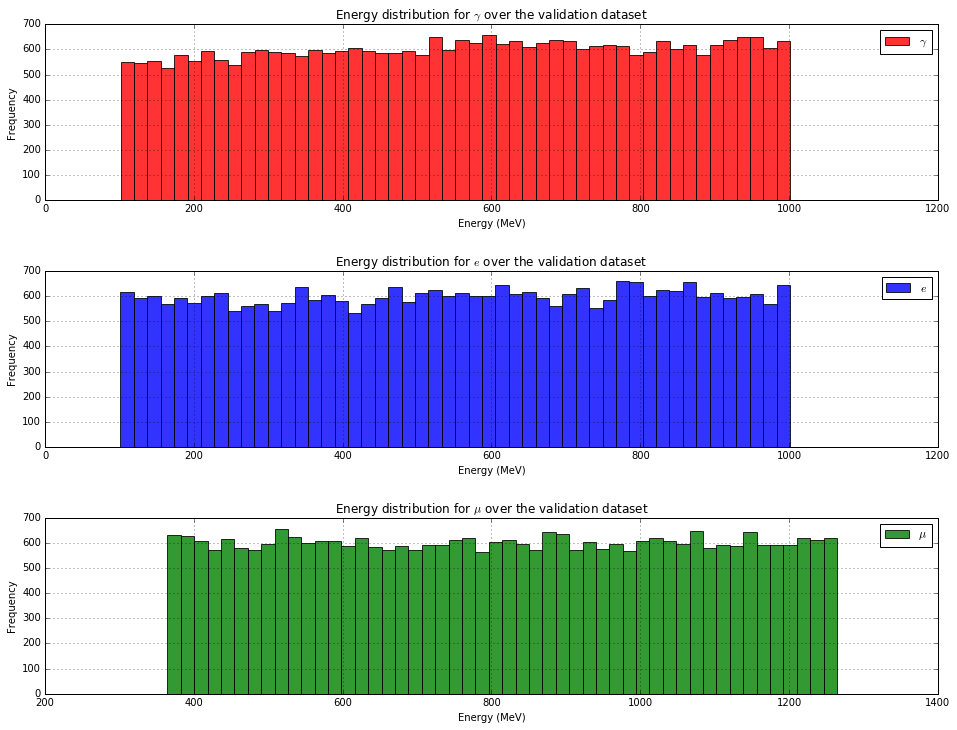

In [105]:
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the validation dataset")

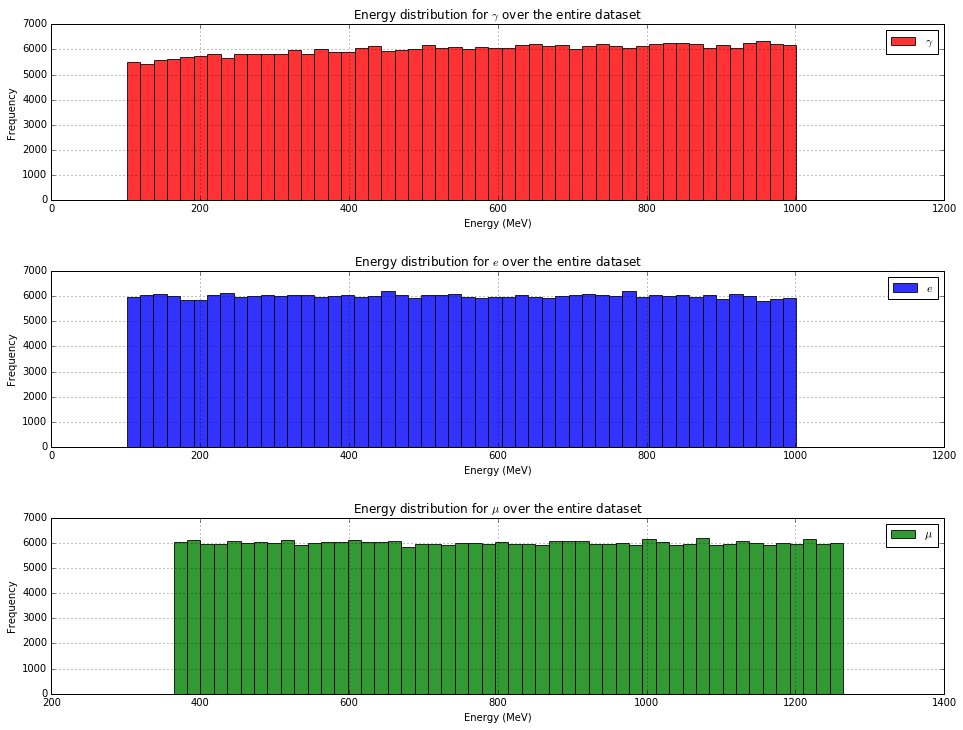

In [5]:
h5 = h5py.File("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5")

energies = np.array(h5["energies"])
labels = np.array(h5["labels"])

gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the entire dataset")

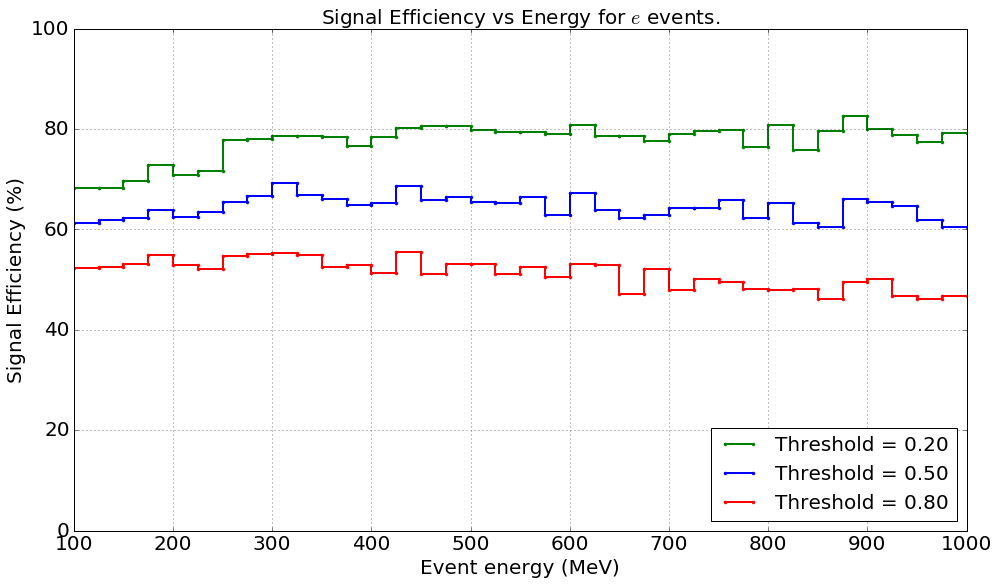

In [106]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1},
                                  particle="e", thresholds=[0.2, 0.5, 0.8], energy_interval=25,
                                  energy_min=100, energy_max = 1000, num_bins=100, save_path=None)

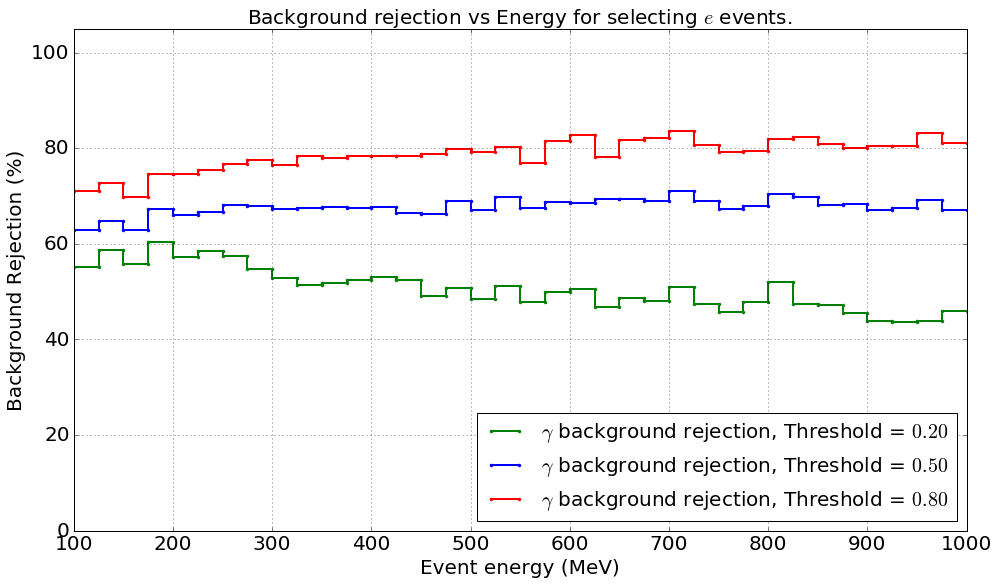

In [107]:
plot_utils.plot_background_rejection(softmaxes, labels, energies, index_dict={"gamma":0, "e":1},
                                     particle="e", thresholds=[0.2, 0.5, 0.8], energy_interval=25,
                                     energy_min=100, energy_max = 1000, num_bins=100, save_path=None)

# Apply the transformation from the real energies to visible energies

In [108]:
# Constants for the particle masses
m_mu = 105.7
m_e = 0.511
m_p = 0.511

# Constant for the inverse refractive index of water
beta = 0.75

# Denomator for the scaling factor to be used for the cherenkov threshold
dem = math.sqrt(1 - beta**2)

for i in range(len(gamma_energies)):
    gamma_energies[i] = max((gamma_energies[i] - (m_e / dem) - (m_p / dem)), 0)
    
for i in range(len(e_energies)):
    e_energies[i] = max((e_energies[i] - (m_e / dem)), 0)
    
for i in range(len(mu_energies)):
    mu_energies[i] = max((mu_energies[i] - (m_mu / dem)), 0)

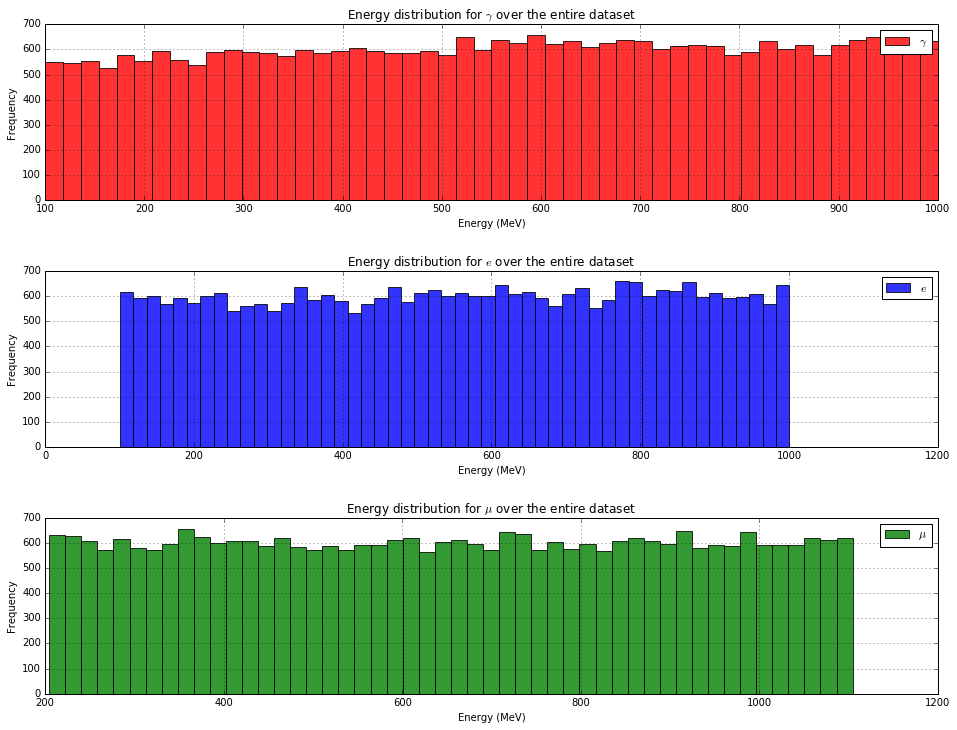

In [109]:
# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the entire dataset")

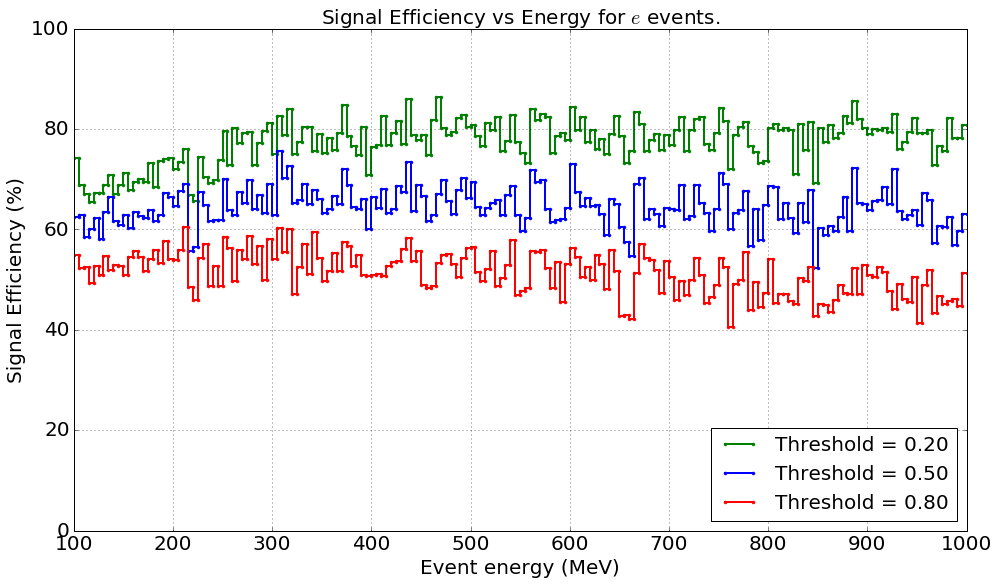

In [115]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1},
                                  particle="e", thresholds=[0.2, 0.5, 0.8], energy_interval=5,
                                  energy_min=100, energy_max = 1000, num_bins=100, save_path=None)

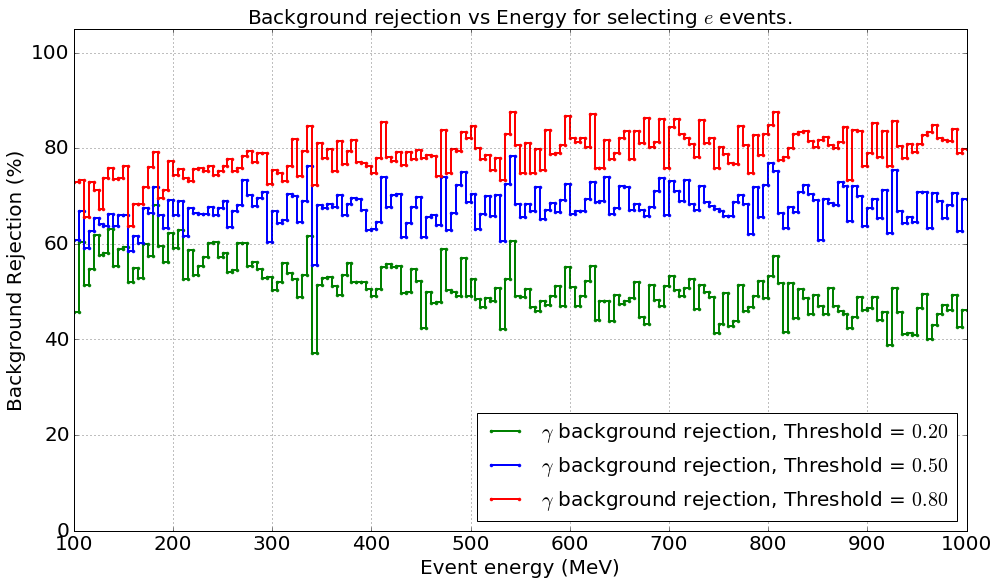

In [116]:
plot_utils.plot_background_rejection(softmaxes, labels, energies, index_dict={"gamma":0, "e":1},
                                     particle="e", thresholds=[0.2, 0.5, 0.8], energy_interval=5,
                                     energy_min=100, energy_max = 1000, num_bins=100, save_path=None)

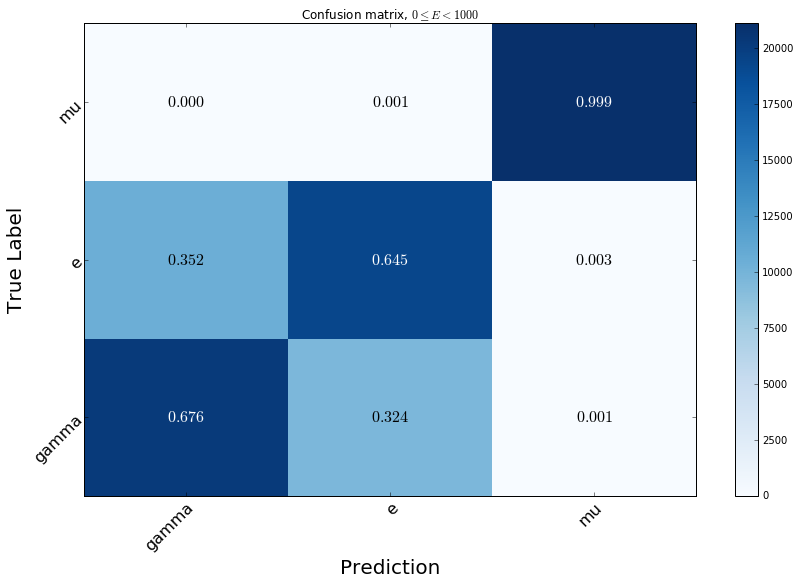

In [114]:
plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"], 0, 1000)

In [123]:
energy_interval = 100
energy_min = 100
energy_max = 1000

# Get the energy intervals to plot the signal efficiency against ( replace with max(energies) ) 
energy_lb = [energy_min+(energy_interval*i) for i in range(math.ceil((energy_max-energy_min)/energy_interval))]
energy_ub = [energy_low+energy_interval for energy_low in energy_lb]

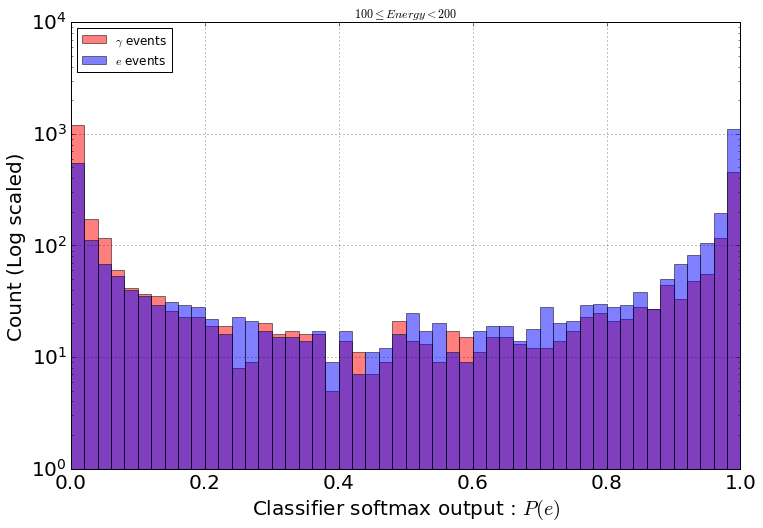

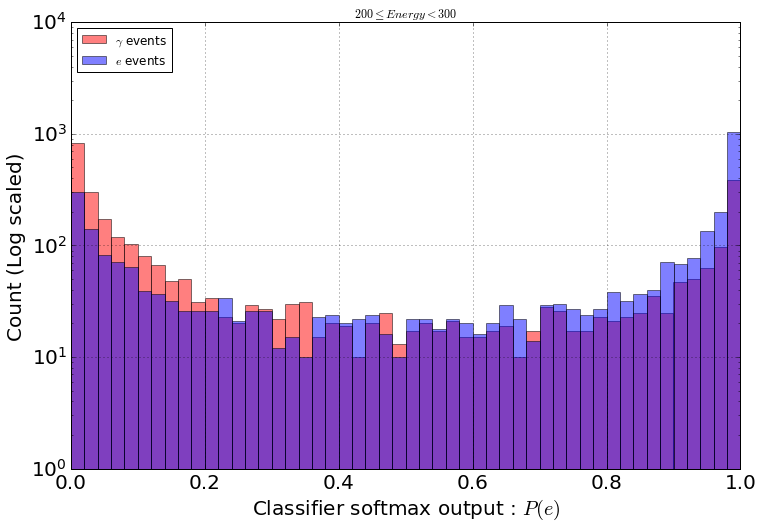

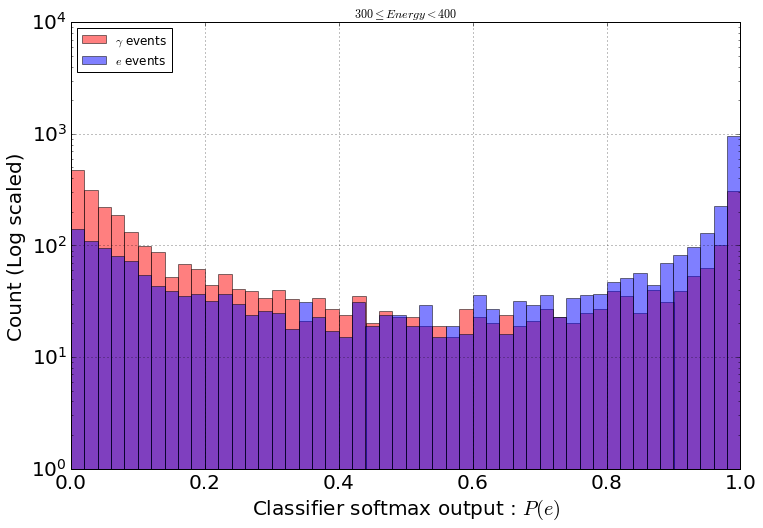

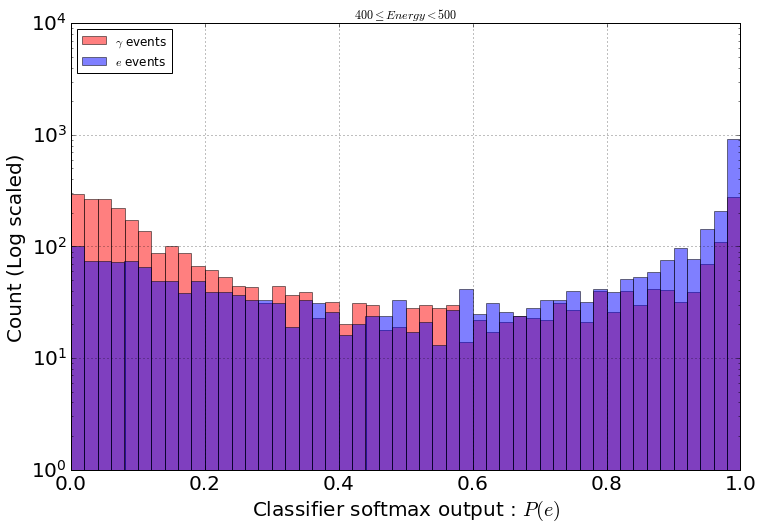

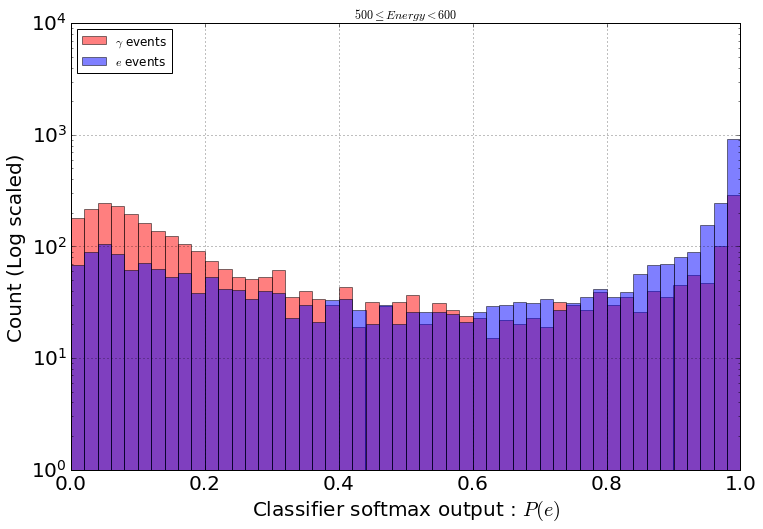

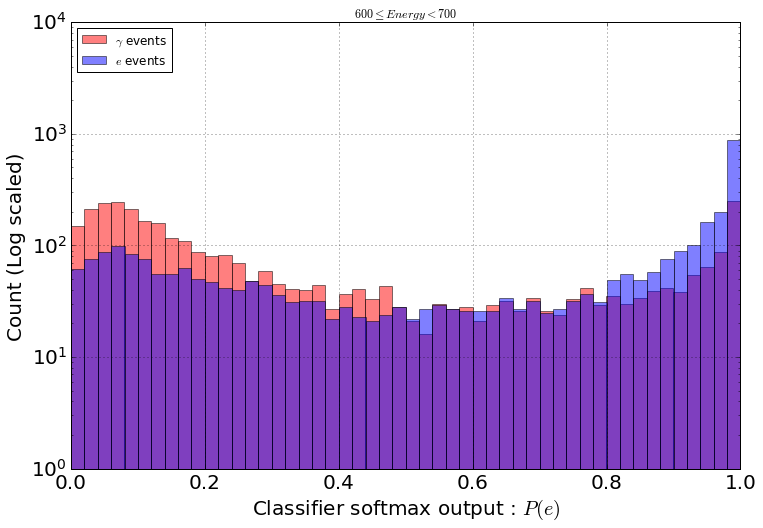

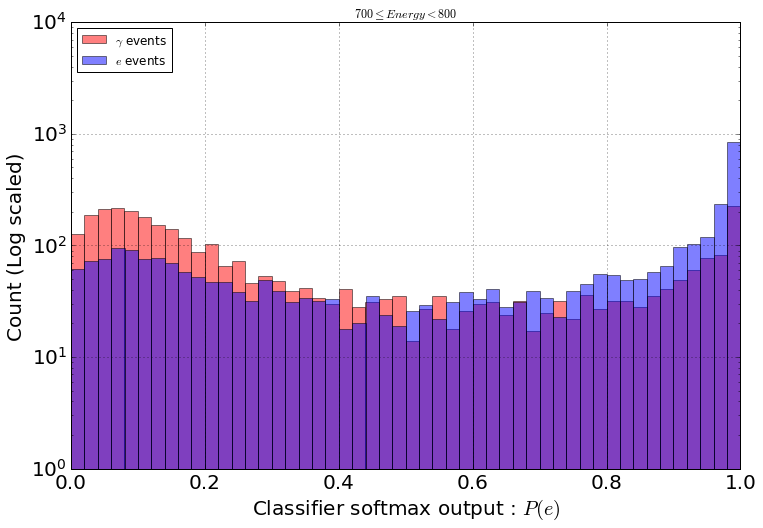

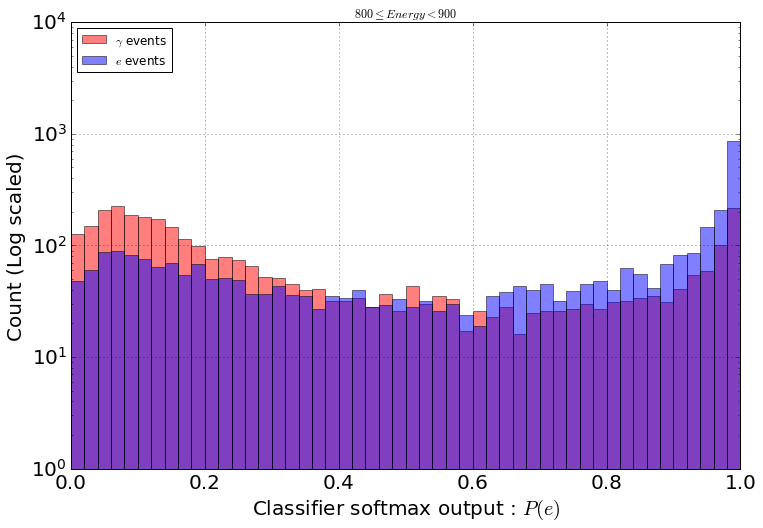

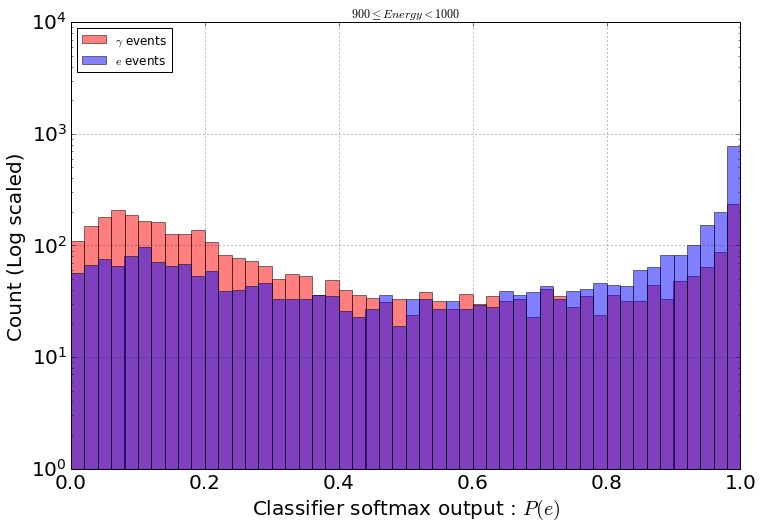

In [124]:
# Iterate over the energy intervals and plot the softmax overlap plots
pass_dict = {"gamma":0, "e":1}
particle="e"

for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    plot_utils.plot_particle_histogram(softmaxes,
                                       labels,
                                       energies,
                                       pass_dict,
                                       {particle:pass_dict[particle]},
                                       energy_lower,
                                       energy_upper,
                                       num_bins=50,
                                       show_events=True)

# Something is clearly wrong with the data loading process since the energies are not getting collected with the right values

In [22]:
from io_utils.data_handling import WCH5Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [88]:
complete_dset = WCH5Dataset("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5",
                            val_split=0.1,
                            test_split=0.1,
                            shuffle=True)

In [89]:
print(complete_dset.train_indices)
print(complete_dset.val_indices)
print(complete_dset.test_indices)

[527984 618093 484217 ... 655059 689868  89104]
[115361 398515 174586 ... 266982 476243 532701]
[362987 755925  45731 ... 131932 671155 121958]


In [90]:
train_iter=DataLoader(complete_dset,
                      batch_size=10,
                      shuffle=False,
                      sampler=SubsetRandomSampler(complete_dset.train_indices))

val_iter=DataLoader(complete_dset,
                    batch_size=10,
                    shuffle=False,
                    sampler=SubsetRandomSampler(complete_dset.val_indices))

test_iter=DataLoader(complete_dset,
                     batch_size=10,
                     shuffle=False,
                     sampler=SubsetRandomSampler(complete_dset.test_indices))

In [91]:
labels = []
energies = []

for data in iter(train_iter):
    labels.extend(data[1].long())
    energies.extend(data[2].float())

In [92]:
labels = np.hstack(labels)
energies = np.hstack(energies)

In [93]:
print(labels.shape)
print(energies.shape)

(720000,)
(720000,)


In [94]:
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

print(len(gamma_energies))
print(len(e_energies))
print(len(mu_energies))

239910
240206
239884


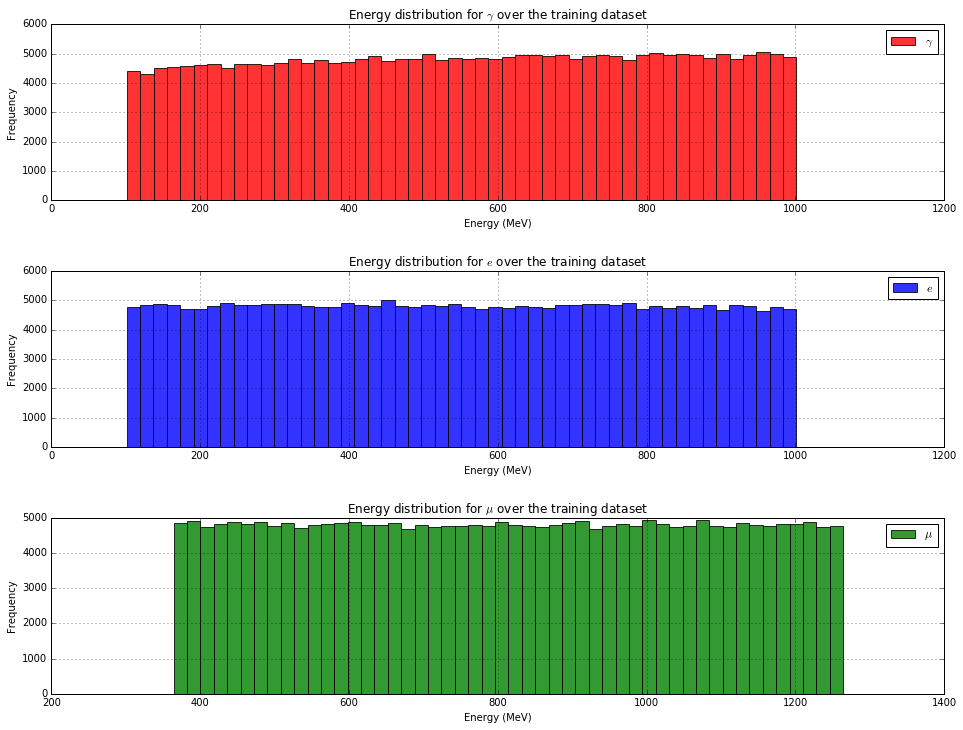

In [95]:
# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the training dataset")

In [96]:
labels = []
energies = []

for data in iter(train_iter):
    labels.extend(data[1].long())
    energies.extend(data[2].float())
    
labels = np.array(labels)
energies = np.array(energies)
    
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

print(len(gamma_energies))
print(len(e_energies))
print(len(mu_energies))

# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the validation dataset")

KeyboardInterrupt: 

300000
300000
300000


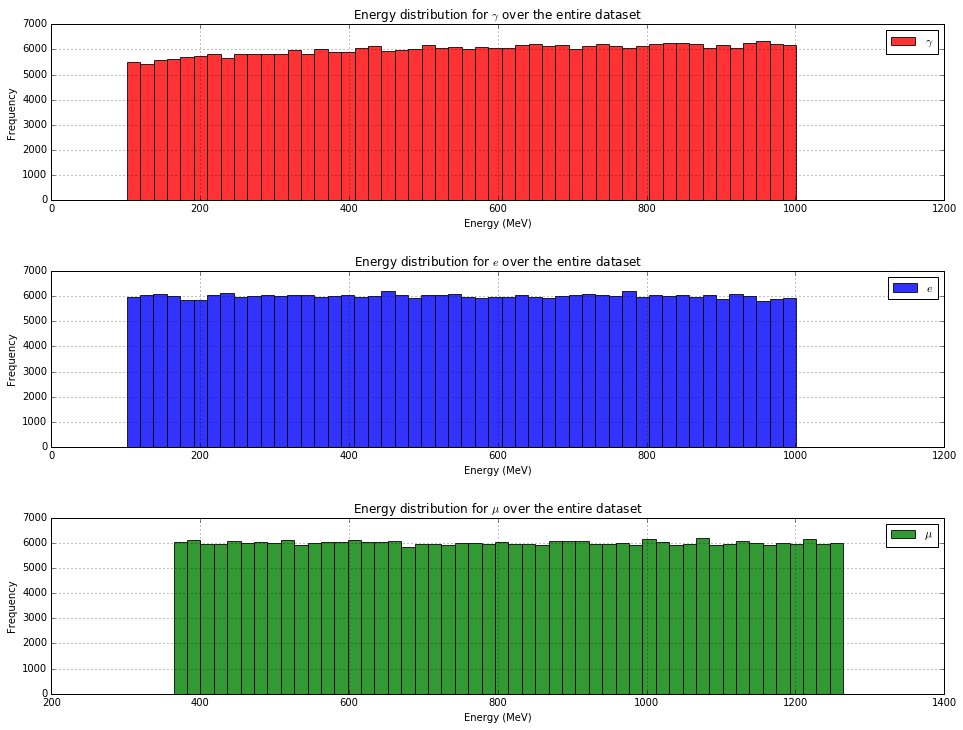

In [97]:
labels = []
energies = []


for data in iter(train_iter):
    labels.extend(data[1].long())
    energies.extend(data[2].float())
    
for data in iter(val_iter):
    labels.extend(data[1].long())
    energies.extend(data[2].float())
    
for data in iter(test_iter):
    labels.extend(data[1].long())
    energies.extend(data[2].float())
    
labels = np.hstack(labels)
energies = np.hstack(energies)
    
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

print(len(gamma_energies))
print(len(e_energies))
print(len(mu_energies))

# Extract the energies for various particle types to plot the histogram
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the entire dataset")